# Supervised Learning - Linear Regression

## Types of Linear Regression

We have learned how to get started with machine learning
using simple linear regression, first using Python, and then followed by using the <b>Scikit-learn</b> library. Now we will look into linear regression in more detail and discuss another variant of linear regression known as polynomial regression.<br>
Figure below shows the <b>Iris dataset</b><br> 
The first four columns are known as the <b>features</b>, or also commonly referred to as the independent variables.<br>
The last column is known as the <b>label, or commonly called the dependent variable</b> (or dependent variables if there is more than one label).

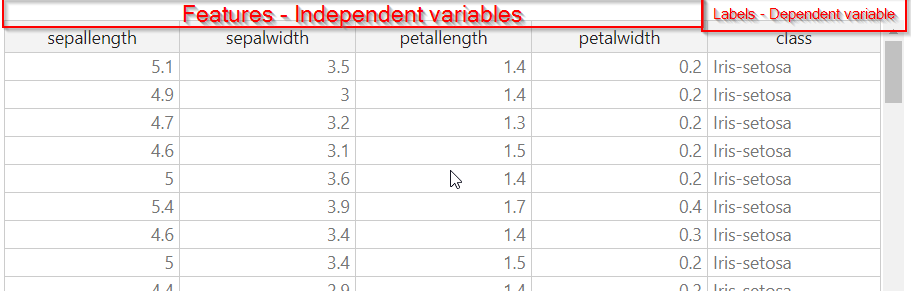

In [2]:
from IPython.display import Image
Image(filename='Features_Label.png')

<b>Features</b> are also sometimes called explanatory variables, while <b>labels</b> are also sometimes called <b>targets</b>. 

In <b>simple linear regression</b>, we talked about the linear relationship between one independent variable and one dependent variable.<br>
Besides simple linear regression, we will also discuss the following:<br>
- <b>Multiple Regression Linear</b> relationships between two or more independent variables and one dependent variable.<br>
- <b>Polynomial Regression Modeling</b> the relationship between one independent variable and one dependent variable using an 11th degree polynomial function.<br>
- <b>Polynomial Multiple Regression Modeling</b> the relationship between two or more independent variables and one dependent variable using an nth degree polynomial function.<br>

There is another form of linear regression, called <b>multivariate linear regression</b>, where there is more than one correlated dependent variable in the relationship. Multivariate linear regression is beyond the scope.

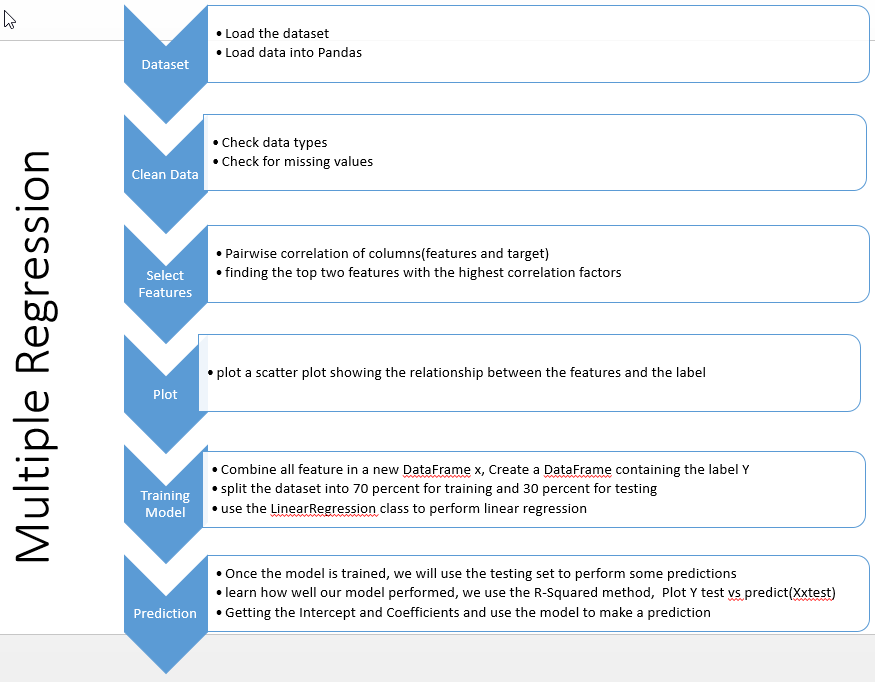

In [38]:
from IPython.display import Image
Image(filename='multipleRegression.png')

# Linear Regression

In machine learning, <b>linear regression</b> is one of the simplest algorithms that you can apply to a dataset to model the  relationships between features and labels.<br>
In the last notebook (Scikit-learn), we started by exploring simple linear regression, where we could explain the relationship between a feature and a label by using a straight line.<br>
In the following section, we will learn about a <b>variant of simple linear regression, called multiple linear regression</b>, by predicting house prices based on multiple features.

## Using the Boston Dataset

For this example, we will use the Boston dataset, which contains data about the <b>housing and price data</b> in the Boston area. This dataset was taken from the StatLib library, which is maintained at Carnegie Mellon University. <br>
It is commonly used in machine learning, and it is a good candidate to learn about regression problems. <br>
The Boston dataset is available from a number of sources, but it is now available directly from the sklearn.datasets package.<br>
This means you can load it directly in Scikit—learn without needing explicitly to download it.

First, let’s import the necessary libraries and then load the dataset using the load_boston () function:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
dataset = load_boston()


It is always good to <b>examine the data</b> before you work with it. The <b>data property</b> contains the data for the various columns of the dataset:

In [5]:
print(dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


The data is a two-dimensional array. To know the <b>name of each column (feature)</b>, use the <b>feature__names property</b>:

In [6]:
print(dataset.feature_names)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


For the <b>description of each feature</b>, you can use the DESCR property:

In [7]:
print(dataset.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The <b>prices of houses is the information we are seeking</b>, and it can be accessed via the <b>target property</b>:

In [7]:
print(dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Now let’s load the data into a <b>Pandas DataFrame</b>:

In [8]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

You would also want to <b>add the prices of the houses to the DataFrame</b>, so let’s add a new column to the DataFrame and call it <b>MEDV</b>:

In [9]:
#Median value of owner-occupied homes in $1000's
df['MEDV'] = dataset.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## Data Cleansing

The next step would be to <b> clean the data</b> and perform any conversion if necessary.<br> First, use the info () function to <b>check the data type of each field</b>:

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


<b>As Scikit—learn only works with fields that are numeric</b>, you need to encode string values into numeric values. <br>
Fortunately, the dataset contains all numerical values, and so no encoding is necessary. <br>
Next, we need to <b>check to see if there are any missing values</b>. <br>
To do so, use the isnull () function:

In [11]:
print(df.isnull().sum())
#Again, the dataset is good, as it does not have any missing values:

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Feature Selection

Now that the data is good to go, we are ready to move on to the next step of the process. As there are 13 features in the dataset, <b>we do not want to use all of these features for training our model, because not all of them are relevant.</b><br>
Instead, we want to <b>choose those features that directly influence the result (that is, prices of houses) to train the model</b>. For this, we can use the corr () function.<br>
The corr() function computes the <b>pairwise correlation of columns:</b>

In [12]:
corr = df.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<b>A positive correlation</b> is a relationship between two variables in which both variables move in tandem. A positive correlation exists when <b>one variable decreases as the other variable decreases, or one variable increases while the other variable incrases</b>. <br>
Similarily, a <b>negative correlation</b> is a relatioship between two variables in which <b>one variable increases as the other decreases</b>.<br>
- A perfect negative correlation is represented by the value -1.00:
- A 0.00 indicates no correlation and,
- A +1.00 indicates a perfect positive correlation.<br>

<br>
- RM       average number of rooms per dwelling<br>
- LSTAT    % lower status of the population<br>
- MEDV     Median value of owner-occupied homes in $1000's <br>
From the <b>MEDV</b> column in the output you can see that the <b>RM and LSTAT features</b> have a <b>high correlation</b> factors (positive and negative correlations) with the MEDV:

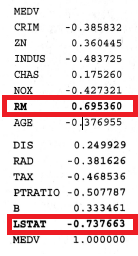

In [17]:
from IPython.display import Image
Image(filename='MEDV.png')

This means that <b>as LSTAT ("% of lower status of the population") increases, the prices of houses go down.When LSTAT decreases, the prices go up.</b><br>Similarly, <b>as RM (“average number of rooms per dwelling”) increases, so will the price. And when RM goes down, the prices go down as well.</b><br>
Instead of Visually finding the top two features with the highest correlation factors, we can do it programmatically as follows:

In [18]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])


Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


We will ignore the first result, as MEDV definitely has a perfect correlation
with itself!<br>
<b>Since RM and LSTAT have high correlation values, we will use these two features to train our model.</b>
<br>
- RM       average number of rooms per dwelling<br>
- LSTAT    % lower status of the population<br>
- MEDV     Median value of owner-occupied homes in $1000's <br>

From dataset documentation in Table IV of Harrison & Rubin (1978), <b>LSTAT is defined as:</b>
<br>
<b>Proportion of population that is lower status</b> = 1/2 (proportion of adults without, some high school education and proportion of male workers classified as laborers). The logarithmic specification implies that socioeconomic status distinctions mean more in the upper brackets of society than in the lower classes. Source: 1970 U. S. Census
<br>
Harrison Jr, David, and Daniel L. Rubinfeld. "Hedonic housing prices and the demand for clean air." Journal of environmental economics and management 5, no. 1 (1978): 81-102.

## Multiple Regression

In the previous section, you saw how to perform a simple linear regression using a single feature and a label.<b>Often, you might want to train your model using more than one independent variable and a label. This is known as multiple regression.</b><br>
In multiple regression, two or more independent variables are used to predict the value of a dependent variable (label).<br>
Now let’s plot a scatter plot showing the <b>relationship between the LSTAT feature and the MEDV label</b>:
<br>
- LSTAT    % lower status of the population<br>
- MEDV     Median value of owner-occupied homes in $1000's <br>

Text(0, 0.5, 'MEDV')

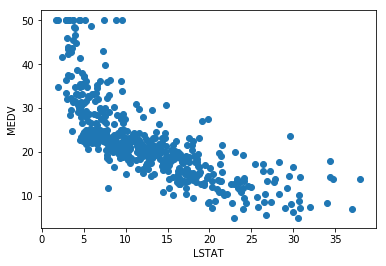

In [21]:
%matplotlib inline

plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
#Scatter plot showing the relationship between LSTAT and MEDV
#shows the scatter plot. It appears that there is a linear correlation
#between the two.

Let’s also plot a scatter plot showing the <b>relationship between the RM feature and the MEDV label</b>:

Text(0, 0.5, 'MEDV')

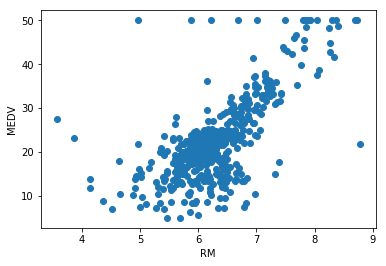

In [23]:
#Scatter plot showing the relationship between RM and MEDV
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')
#shows the scatter plot. Again, it appears that there is a linear correlation
#between the two, albeit with some outliers.

Better still, let’s plot the two features and the label on a 3D Chart:
<br>
- RM       average number of rooms per dwelling<br>
- LSTAT    % lower status of the population<br>
- MEDV     Median value of owner-occupied homes in $1000's <br>

#The following, shows the 3D chart of LSTAT and RM plotted against MEDV.

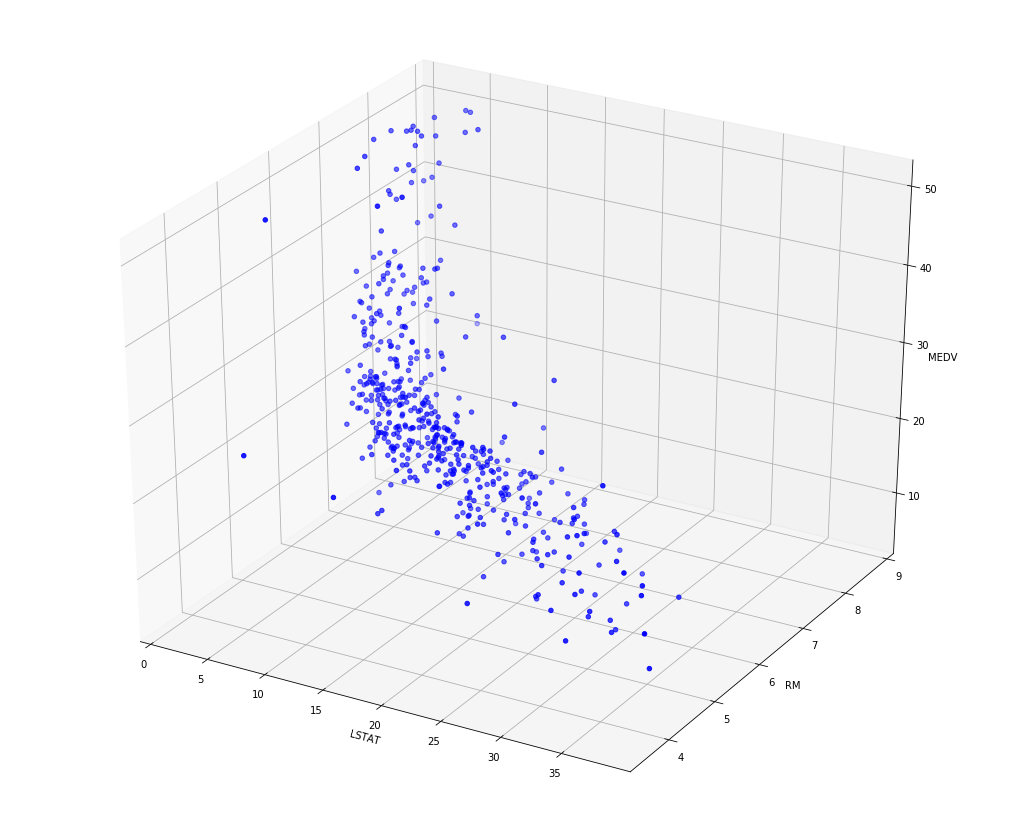

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()
#shows relationship between LSTAT, RM and MEDV

## Training the Model

We can now train the model.<br> 
First, create two DataFrames x and Y. <br>
The <b>x DataFrame</b> will contain the combination of the <b>LSTAT and RM features</b>, 
<br>while the <b>Y DataFrame</b> will contain the <b>MEDV label</b>:

In [28]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

Think of np.c_ this way: If you have data series of 30 records apiece collected into separate 1D arrays, <b>np.c_ combines these series</b> as you would in an excel table: side-by-side in separate columns of 30, rather than extending the first series.<br>
Example<br>
np.c_[np.array([1,2,3]), np.array([4,5,6])]<br>
But there isn't second axis. So we mentally add one. so shape of both array becomes (3,1).
So resultant shape would be (3,1+1) which is (3,2). which is the shape of result<br>
array([[1, 4],<br>
.........[2, 5],<br>
.........[3, 6]])<br>

### split the dataset

<b>We will split the dataset into 70 percent for training and 30 percent for testing:</b>

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In a later class, "Classification Using Logistic Regression,”
we will discuss more about the train_test_split () function.

After the split, let’s <b>print out the shape of the training sets:</b>

In [30]:
print(x_train.shape)
print(Y_train.shape)


(354, 2)
(354,)


This means that the x training set now has 354 rows and 2 columns, while the Y training set (which contains the label) has 354 rows and 1 column. Let’s also print out the testing set:

In [31]:
print(x_test.shape)
print(Y_test.shape)
#This time, the testing set has 152 rows:

(152, 2)
(152,)


<b>We are now ready to begin the training.</b><br>
As we learned, you can use the <b>LinearRegression class to perform linear regression</b>.<br>
In this case, we will use it to train our model:

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Once the model is trained, we will use the testing set to perform some predictions:

In [33]:
price_pred = model.predict(x_test)

To <b>learn how well our model performed, we use the R—Squared method</b> that you learned in the Scikit-leanr notebook.<br>
The R-Squared method lets you know how close the test data fits the regression line. 
- A value of 1.0 means a perfect fit. 
<br>So, you aim for a value of R—Squared that is close to 1:

In [34]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))


R-squared: 0.6162


We will also plot a scatter plot showing the actual price vs. the predicted price:

36.494221109153244


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

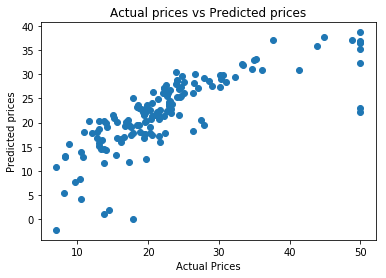

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
#shows the plot. Ideally, it should be a straight line, but for now it
#is good enough.

Above scatter plot showing the predicted prices vs. the actual prices

## Getting the Intercept and Coefficients

The formula for multiple regression is as follows:<br>
Y = B0 + B1 x1 + B2 x2 where Y is the dependent variable, B0 is the intercept, and B1 and B2 are the coefficient of the two features x1 and x2, respectively.<br>
With the model trained, we can obtain the intercept as well as the coefficients of the features:

In [35]:
print(model.intercept_)
print(model.coef_)


0.38437936780346504
[-0.65957972  4.83197581]


We can use the model to make a prediction for the house price when LSTAT
is 30 and RM is 5:

In [36]:
print(model.predict([[30,5]]))


[4.75686695]


You can verify the predicted value by using the formula that was given earlier:
Y = Bo + B1 x1 + B2 x2
Y = 0.3843793678034899 + 30(—0.65957972) + 5(4.83197581)
Y = 4.7568

## Plotting the 3D Hyperplane

Let’s plot a 3D regression hyperplane showing the predictions:

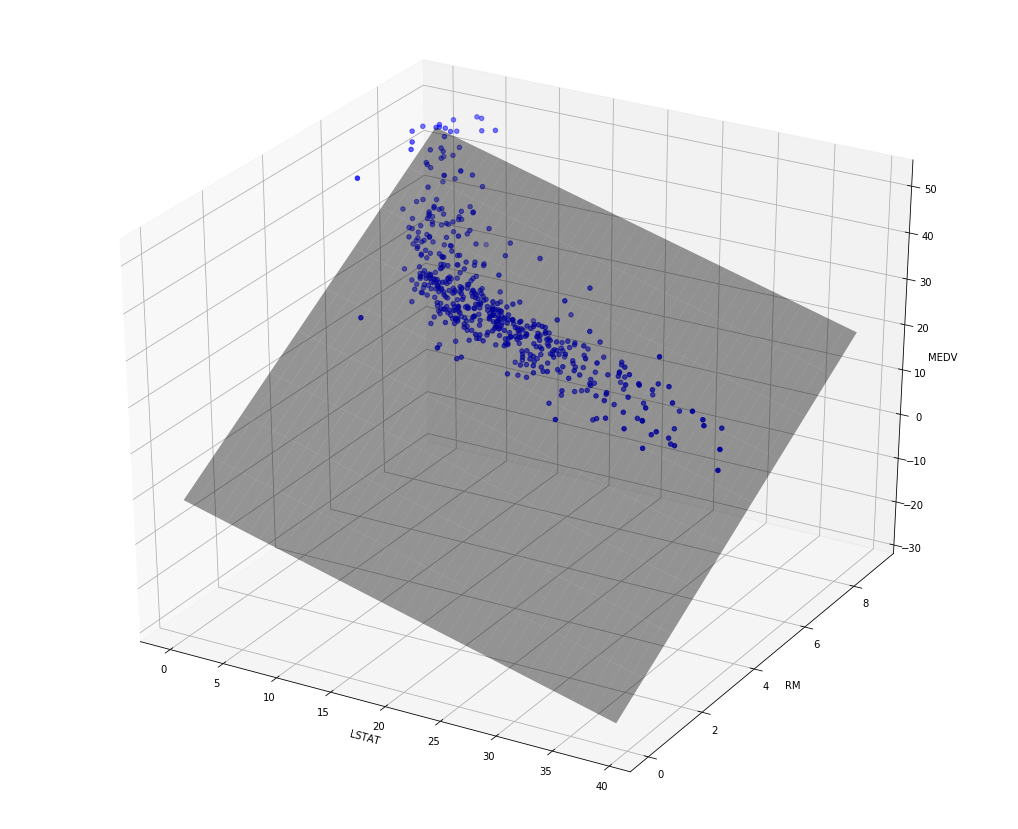

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


Here, we are training the model using the entire dataset. We then make predictions by passing a combination of values for LSTAT (x _ surf) and RM (y_surf) and calculating the predicted values using the model’s intercept and coefficients. <br>
The hyperplane is then plotted using the plot_surface() function. The end result is shown in Figure below.<br>


# Exercises
---

As the chart shown in Jupyter Notebook is static, save the preceding code snippet in a file named boston.py and run it in Terminal, like this:
$ python boston.py

you will be able to rotate the chart and move it around to have a better perspective.

1. Try the above in a python file. 

# Polynomial Regression

Inthe previous section we saw how you can apply linear regression to predict the prices of houses in the Boston area. While the result is somewhat acceptable, it is not very accurate. This is because sometimes a linear regression line might not be the best solution to capture the relationships between the features and label accurately. In some cases, a curved line might do better.

Consider the series of points bellow which are stored in a csv file.

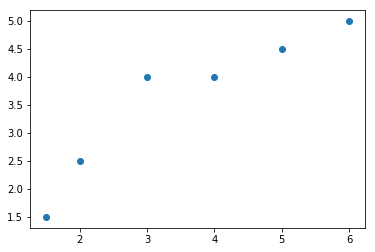

In [40]:
df = pd.read_csv('polynomial.csv')
plt.scatter(df.x,df.y)


Using linear regression, you can try to plot a straight line cutting through most of the points:

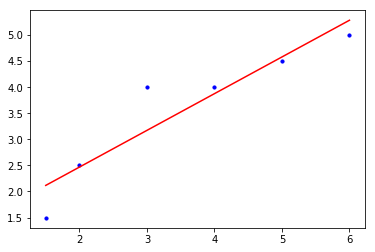

R-squared for training set: 0.8658


In [41]:
model = LinearRegression()

x = df.x[0:6, np.newaxis]     #---convert to 2D array---
y = df.y[0:6, np.newaxis]     #---convert to 2D array---

model.fit(x,y)

#---perform prediction---
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x, y, s=10, color='b')

#---plot the straight line---
plt.plot(x, y_pred, color='r')
plt.show()
#You will see the straight regression line

#---calculate R-squared---
print('R-squared for training set: %.4f' % model.score(x,y))


We want to see if there is a more accurate way to fit the pom’ts. For instance, instead of a straight line, we want to investigate the possibility of a curved line. This is where polynomial regression comes in.

## Formula for Polynomial Regression

Polynomial regression is an attempt to create a polynomial function that fits a set of data points.

A polynomial function of degree 1 has the following form:

Y = β0 + β1x

Quadratic regression is a degree 2 

Y = β0 + β1x + β2x2

For a polynomial of degree 3, the formula is as follows:

Y = β0 + β1x + β2x2 + β3x3

In general, a polynomial of degree n has the formula of:

Y = β0 + β1x + β2x2 + β3x3 + … + βnxn

The idea behind polynomial regression is simple — find the coefficients of the polynomial function that best fits the data.


## Polynomial Regression in Scikit-learn

The Scikit—learn library contains a number of classes and functions for solving polynomial regression. The PolynomialFeatures class takes in a number specifying
the degree of the polynomial features. In the following code snippet, we are creating a quadratic equation (polynomial function of degree 2):

In [42]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2

polynomial_features = PolynomialFeatures(degree = degree)


Using this PolynomialFeatures object, you can generate a new feature matrix consisting of all polynomial combinations of the features with a degree of less than or equal to the specified degree:

In [43]:
x_poly = polynomial_features.fit_transform(x)
print(x_poly)


[[ 1.    1.5   2.25]
 [ 1.    2.    4.  ]
 [ 1.    3.    9.  ]
 [ 1.    4.   16.  ]
 [ 1.    5.   25.  ]
 [ 1.    6.   36.  ]]


The matrix that you see is generated as follows:
- The first column is always 1.
- The second column is the value of x.
- The third column is the value of x^2.
This can be verified using the get_feature_names() function:

check out the following link on the math behind polynomial regression: http://polynomialregression.drque.net/math.html.
You will now use this generated matrix with the LinearRegression class to train your model:

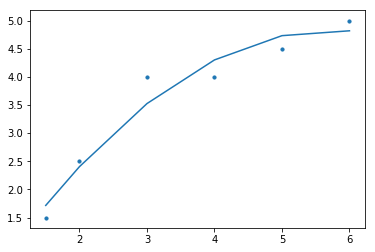

In [29]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#---plot the points---
plt.scatter(x, y, s=10)

#---plot the regression line---
plt.plot(x, y_poly_pred)
plt.show()


shows the regression line, a nice curve trying to fit the points.
You can print out the intercept and coefficients of the polynomial function:

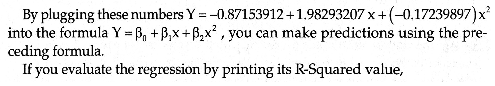

In [44]:
from IPython.display import Image
Image(filename='pluggingNumbers.png')

In [30]:
print(model.intercept_)
print(model.coef_)


[-0.87153912]
[[ 0.          1.98293207 -0.17239897]]


In [31]:
print('R-squared for training set: %.4f' % model.score(x_poly,y))


R-squared for training set: 0.9474


# Exercise

Can the R-squared calue be improved? Let's try a degree 3 polynomial. Using the same code and changing degree to 3. You should get a curve as follows

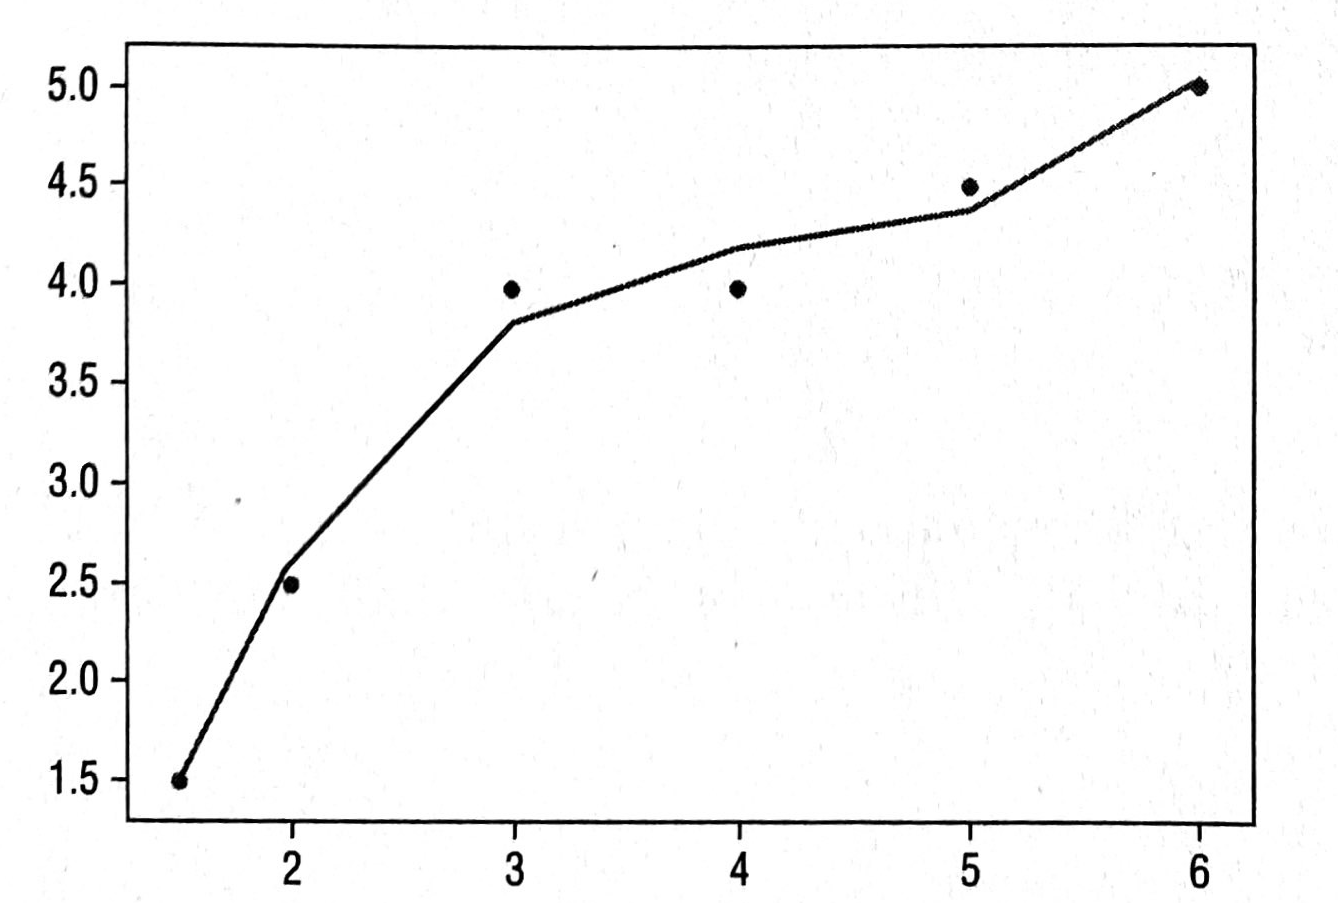

In [46]:
from IPython.display import Image
Image(filename='cubicPoly.png')

You will get a R-square value of 0.9889

Try it!

You now see a curve that more closely fits the points and a much-improved R-Squared value. Moreover, since raising the polynomial degree by 1 improves the R—Squared value, you might be tempted to increase it further. In fact, the following figure
shows the curve when the degree is set to 4. It fits all the points perfectly.

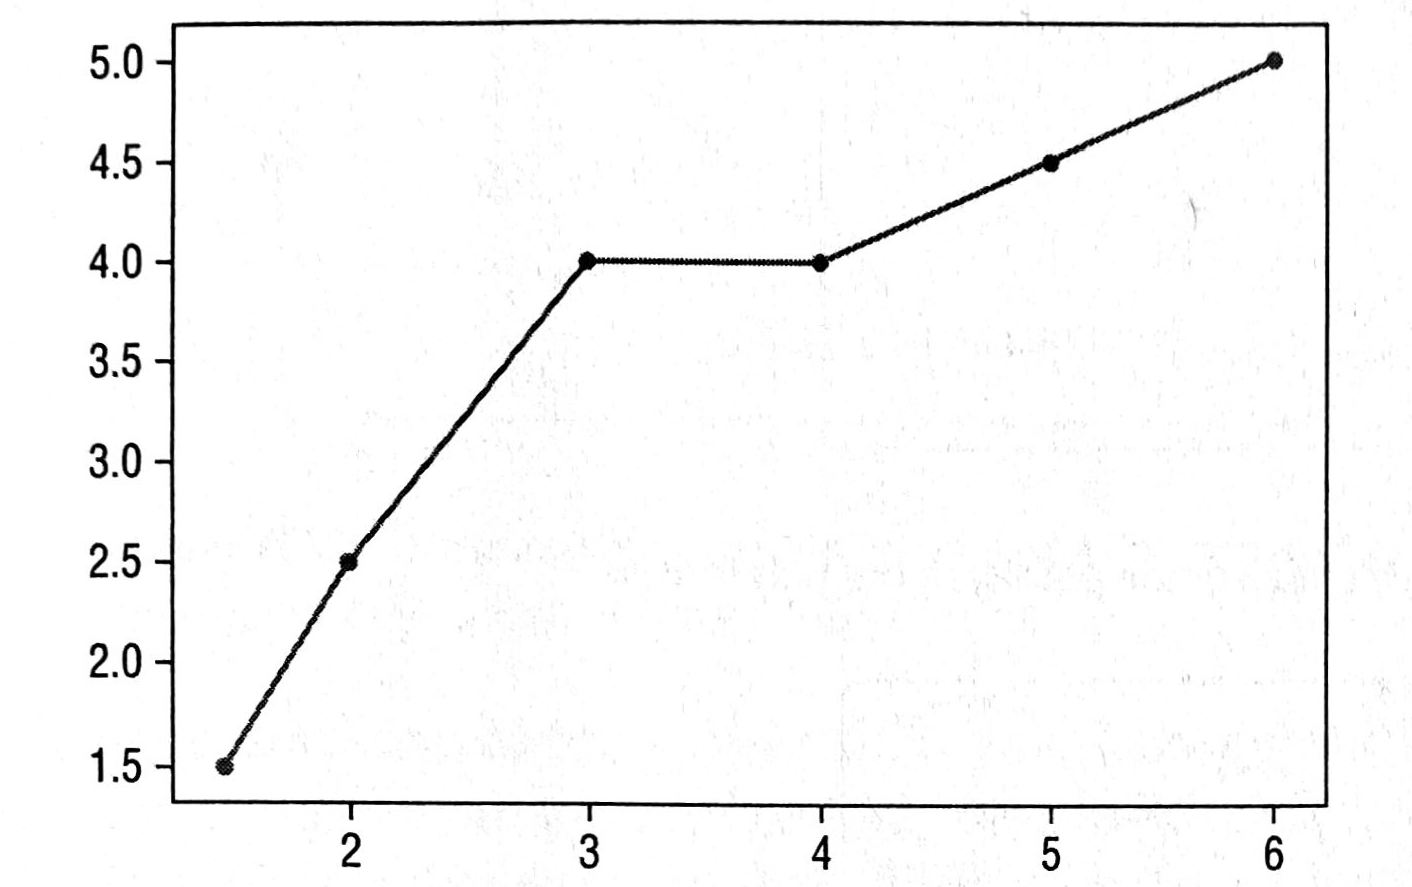

In [47]:
from IPython.display import Image
Image(filename='quadPoly.png')


And guess what? You get an R—Squared value of 1! However, before you celebrate your success in finding the perfect algorithm in your prediction, you need to realize that while your algorithm may fit the training data perfectly, it is unlikely to perform well with new data. This is a known as overfitting, and
the next section will discuss this topic in more detail.

# Understanding Bias and Variance

The inability for a machine learning algorithm to capture the true relationship between the variables and the outcome is known as the bias. Figure in the top-left shows a straight line trying to fit all the points. Because it doesn’t cut through all of the points, it has a high bias. 

The curvy line in top-right however, is able to fit all of the points and thus has a low bias.

While the straight line can’t fit through all of the points and has high bias, when it comes to applying unseen observations, it gives a pretty good estimate. Figure bottom-left shows the testing points (bigger size). 

The RSS (Residual Sum of Squares), which is the sum of the errors of prediction, is pretty low compared to that of the curvy line when using the same test points (see Figure bottom-right).

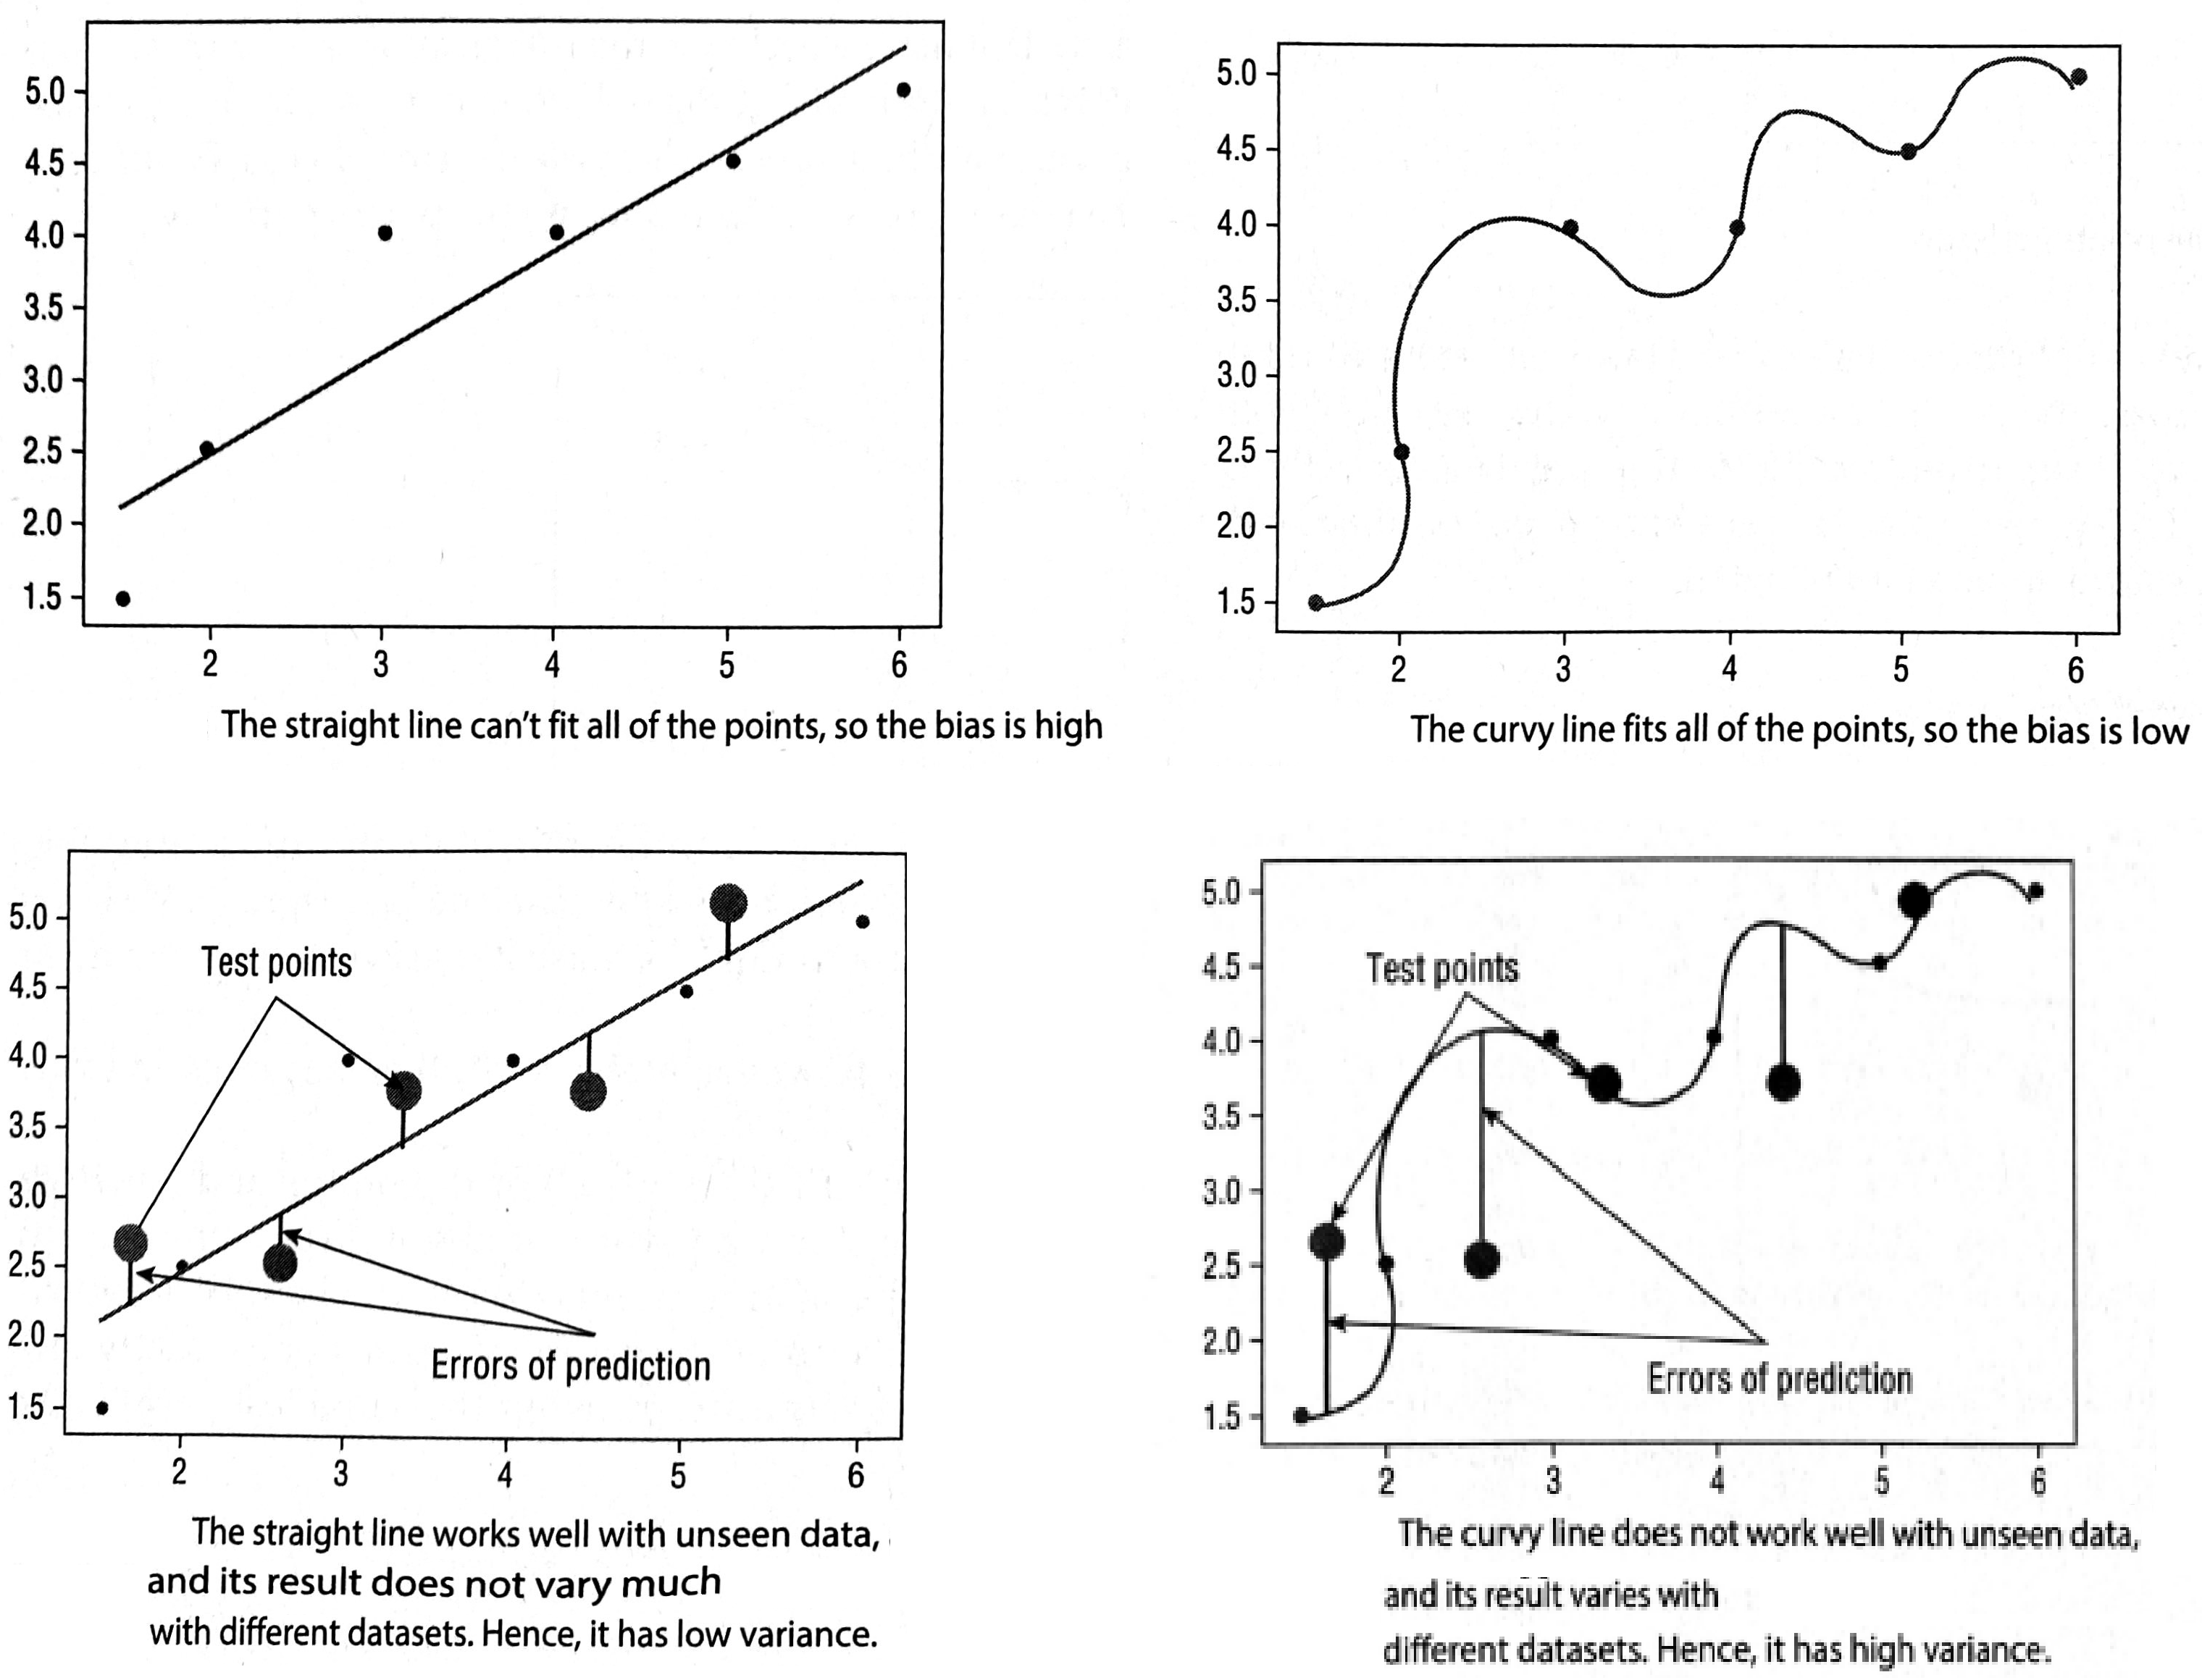

In [49]:
from IPython.display import Image
Image(filename='biases.png')

In machine learning, the fit between the datasets is known as variance. In this example, the curvy line has high variance because it will result in vastly different
RSS for different datasets. That is, you can’t really predict how well it will perform with future datasets—sometimes it will do well with certain datasets and at other times it may fail badly. On the other hand, the straight line has a low variance, as the RSS is similar for different datasets.

In machine learning, when we try to find a curve that tries to fit all of the points perfectly, it is known as overfitting. 0n the other hand, if we have a line that does not fit most points, it is known as underfitting.

Ideally, we should find a line that accurately expresses the relationships between the independent variables and that of the outcome. Expressed in terms of bias and variance, the ideal algorithm should have the following:
<br>
- High bias, with the line hugging as many points as possible
<br>
- Low variance, with the line resulting in consistent predictions using different datasets

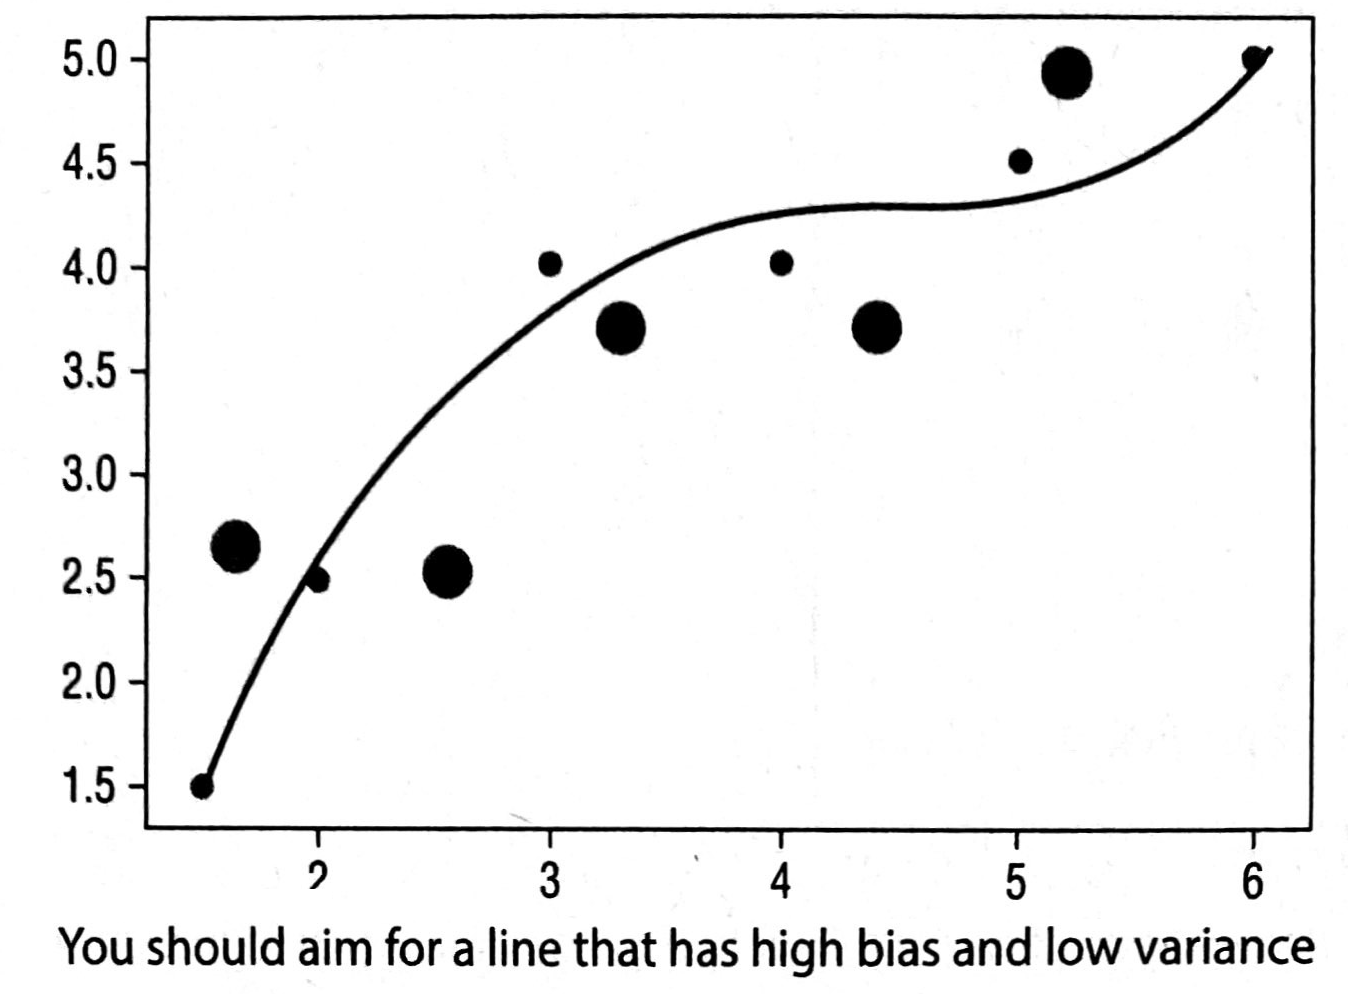

In [50]:
from IPython.display import Image
Image(filename='highBiasLowVariance.png')

Above such an ideal curve—high bias and low variance.
To strike a balance between finding a simple model and a complex model, you can use techniques such as Regularization, Bagging, and Boosting:

- Regularization is a technique that automatically penalizes the extra features you used in your modeling.
- Bagging (or bootstrap aggregation) is a specific type of machine learning process that uses ensemble learning to evolve machine learning models. Bagging uses a subset of the data and each sample trains a weaker learner. The weak learners can then be combined (through averaging or max vote) to create a strong learner that can make accurate predictions.
- Boosting is also similar to Bagging, except that it uses all of the data to train each learner, but data points that were misclassified by previous learners are given more weight so that subsequent learners will give more focus to them during training.

Ensemble learning is a technique where you use several models working together on a single dataset and then combine its result.

## Using Polynomial Multiple Regression on the Boston Dataset

In the previous sections we used multiple linear regression and trained a model based on the Boston dataset. After learning about the polynomial regression in the previous section, now let’s try to apply it to the Boston dataset and see if
we can improve the model.<br>
As usual, let’s load the data and split the dataset into training and testing sets:

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)


In [54]:
#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_train_poly = polynomial_features.fit_transform(x_train)


When using a polynomial function of degree 2 on two independent variables x1 and x2, the formula becomes:

Y = β0 + β1x1 + β2x2 + β3x1^2 + β4x1x2 +β5x2^2

where Y is the dependent variable, β0 is the intercept, β1, β2, β3, and β4 are the coefficients of the various combinations of the two features x1 and x2, respectively.
You can verify this by printing out the feature names:


In [55]:
#---print out the formula---
print(polynomial_features.get_feature_names(['x','y']))


['1', 'x', 'y', 'x^2', 'x y', 'y^2']


Knowing the pokynomial formula is useful when plotting the 3D hyperplane, which we will do shortly

You can train the model using the LinearRegression class

In [57]:
model = LinearRegression()
model.fit(x_train_poly, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
x_test_poly = polynomial_features.fit_transform(x_test)
print('R-squared: %.4f' % model.score(x_test_poly,
                                      Y_test))


R-squared: 0.7340


you can also print the intercept and coefficients

In [59]:
print(model.intercept_)
print(model.coef_)


26.93343052383921
[ 0.00000000e+00  1.47424550e+00 -6.70204730e+00  7.93570743e-04
 -3.66578385e-01  1.17188007e+00]


With these values, the formula now becomes:

Y = β0 + β1x1 + β2x2 + β3x12 + β4x1x2 +β5x22

Y = 26.9334305238 + 1.47424550e+00 x1 + (-6.70204730e+00) x2 + 7.93570743e-04 x12 + (-3.66578385e-01) x1x2 + 1.17188007e+00 x22


## Plotting the 3D Hyperplane

Since you know the intercept and coefficients of the polynomial multiple regression function, you can plot out the 3D hyperplane of function easily. Save the following code snippet as a file named boston2.py:

['1', 'x', 'y', 'x^2', 'x y', 'y^2']


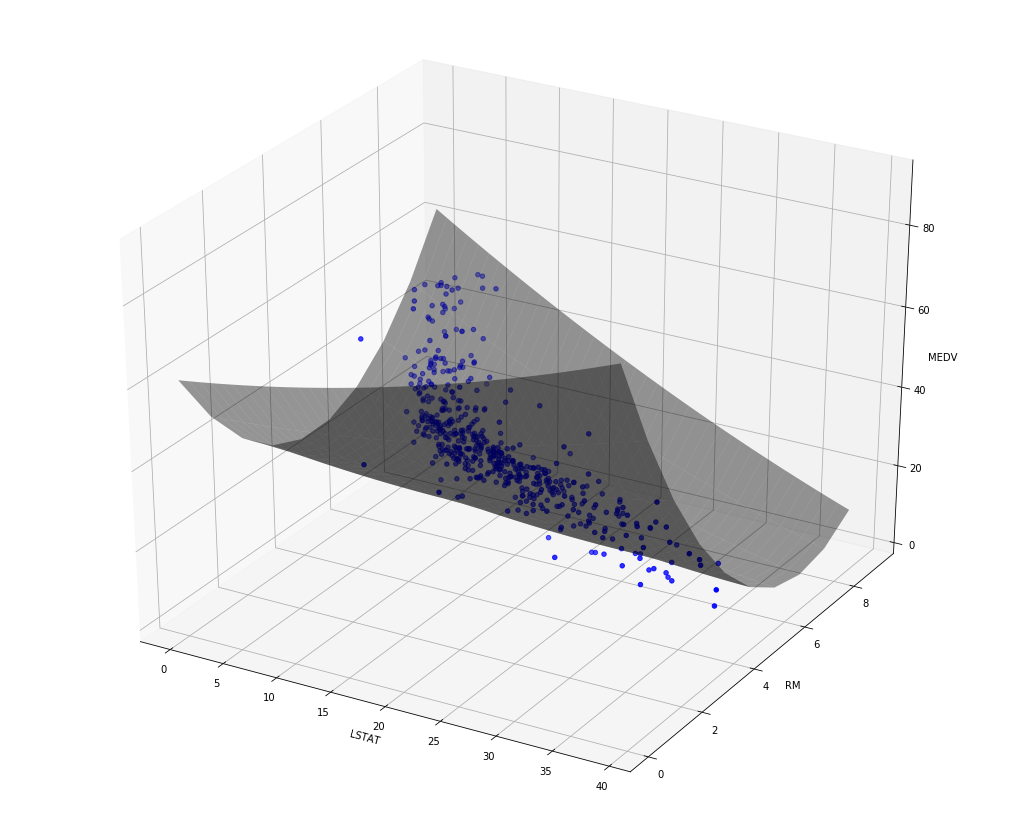

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

#---use a polynomial function of degree 2---
degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))

#---apply linear regression---
model = LinearRegression()
model.fit(x_poly, Y)

#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ +
                (model.coef_[1] * x) +
                (model.coef_[2] * y) +
                (model.coef_[3] * x**2) +
                (model.coef_[4] * x*y) +
                (model.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

plt.show()


# Exercises
---

1. Try the above in a python file.

To run the code, type the following in Terminal:
$ python boston2.py
You will see the 3D chart, as shown in Figure above.
You can drag to rotate the Chart. Figure above shows the different perspectives of the hyperplane.

<b>Summary</b><br>
In this notebook, you learned about the various types of linear regression. In particular, you learned about the following:
- Multiple Regression Linear relationships between two or more independent variables and one dependent variable.
- Polynomial Regression Modeling the relationship between one independent variable and one dependent variable using an nth degree polynomial function.
- Polynomial Multiple Regression Modeling the relationship between two or more independent variables and one dependent variable using an nth degree polynomial function.<br>
You also learned how to plot the hyperplane showing the relationships between two independent variables and the label.